In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc t

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_tvshows = pd.read_csv(path + 'otttvshows.csv')
 
df_tvshows.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18+   6.9             94%       NaN   
1   2         Philadelphia  1993  13+   8.8             80%       NaN   
2   3                 Roma  2018  18+   8.7             93%       NaN   
3   4                  Amy  2015  18+   7.0             87%       NaN   
4   5  The Young Offenders  2016  NaN   8.0            100%       NaN   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country Language  \
0      Action,Drama,Sci-Fi,Thriller                 United States  English   
1                            Comedy                 United States  English   
2  Action,Drama,History,Romance,War  United Kingdom,United States  English   
3                             Drama                 United States  English   
4                            Comedy        United Kingdom,Ireland  English   

                                            Plotline  Runtime       Kind  \
0  Set seven years after the world has become a f...     60.0  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...     22.0  tv series   
2  In this British historical drama, the turbulen...     52.0  tv series   
3  A family drama focused on three generations of...     60.0  tv series   
4                                                NaN     30.0  tv series   

   Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0      3.0        1     0            0        0     1  
1     18.0        1     0            0        0     1  
2      2.0        1     0            0        0     1  
3      6.0        1     0            1        1     1  
4      3.0        1     0            0        0     1

In [6]:
# profile = ProfileReport(df_tvshows)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  5432
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
**************

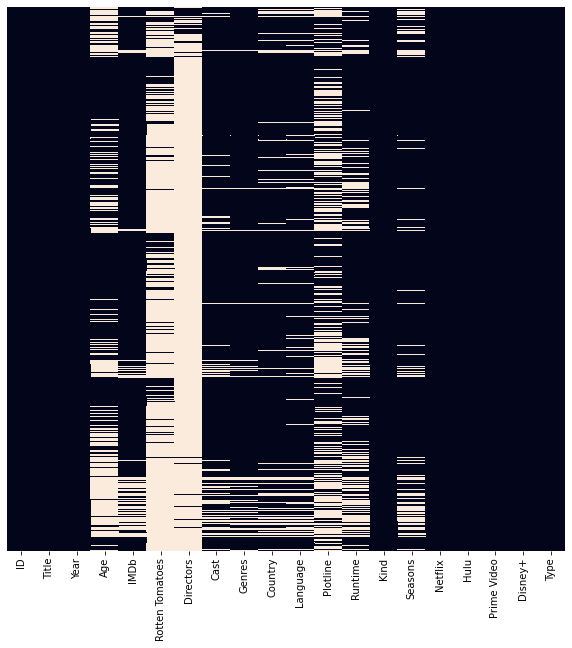

In [8]:
data_investigate(df_tvshows)

In [9]:
# ID
# df_tvshows = df_tvshows.drop(['ID'], axis = 1)
 
# Age
df_tvshows.loc[df_tvshows['Age'].isnull() & df_tvshows['Disney+'] == 1, "Age"] = '13'
# df_tvshows.fillna({'Age' : 18}, inplace = True)
df_tvshows.fillna({'Age' : 'NR'}, inplace = True)
df_tvshows['Age'].replace({'all': '0'}, inplace = True)
df_tvshows['Age'].replace({'7+': '7'}, inplace = True)
df_tvshows['Age'].replace({'13+': '13'}, inplace = True)
df_tvshows['Age'].replace({'16+': '16'}, inplace = True)
df_tvshows['Age'].replace({'18+': '18'}, inplace = True)
# df_tvshows['Age'] = df_tvshows['Age'].astype(int)
 
# IMDb
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].mean()}, inplace = True)
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].median()}, inplace = True)
df_tvshows.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].astype(int)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].mean()}, inplace = True)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].median()}, inplace = True)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'].astype(int)
df_tvshows.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_tvshows = df_tvshows.drop(['Directors'], axis = 1)
df_tvshows.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_tvshows.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_tvshows.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_tvshows.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_tvshows.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_tvshows.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_tvshows.fillna({'Runtime' : df_tvshows['Runtime'].mean()}, inplace = True)
# df_tvshows['Runtime'] = df_tvshows['Runtime'].astype(int)
df_tvshows.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_tvshows.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_tvshows.fillna({'Type': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Type'], axis = 1)
 
# Seasons
# df_tvshows.fillna({'Seasons': 1}, inplace = True)
df_tvshows.fillna({'Seasons': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Seasons'], axis = 1)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
# df_tvshows.fillna({'Seasons' : df_tvshows['Seasons'].mean()}, inplace = True)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
 
# Service Provider
df_tvshows['Service Provider'] = df_tvshows.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_tvshows.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_tvshows.dropna(how = 'any', inplace = True)
df_tvshows.drop_duplicates(inplace = True)

No of Rows :  5432
No of Coloums :  21
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Seasons             object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
S

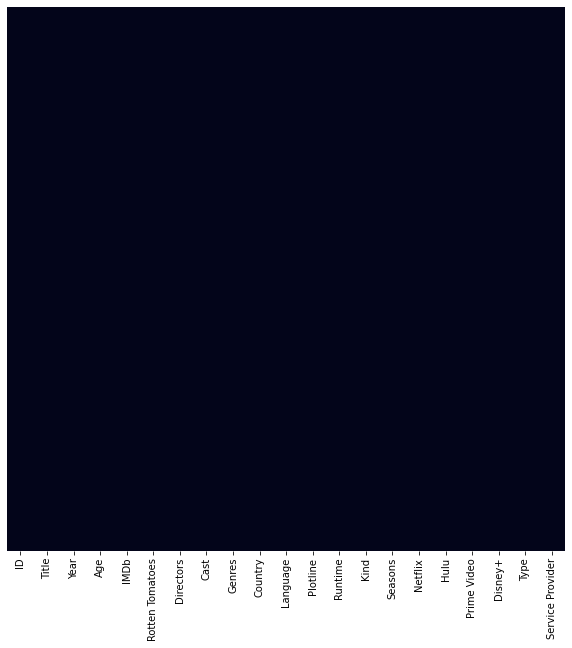

In [10]:
data_investigate(df_tvshows)

In [11]:
df_tvshows.head()

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

                                            Plotline Runtime       Kind  \
0  Set seven years after the world has become a f...      60  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...      22  tv series   
2  In this British historical drama, the turbulen...      52  tv series   
3  A family drama focused on three generations of...      60  tv series   
4                                                 NA      30  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3       1     0            0        0     1           Netflix  
1      18       1     0            0        0     1           Netflix  
2       2       1     0            0        0     1           Netflix  
3       6       1     0            1        1     1           Netflix  
4       3       1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [12]:
df_tvshows.describe()

ID         Year      Netflix         Hulu  Prime Video  \
count  5432.000000  5432.000000  5432.000000  5432.000000  5432.000000   
mean   2716.500000  2010.668446     0.341311     0.293999     0.403351   
std    1568.227662    11.726176     0.474193     0.455633     0.490615   
min       1.000000  1901.000000     0.000000     0.000000     0.000000   
25%    1358.750000  2009.000000     0.000000     0.000000     0.000000   
50%    2716.500000  2014.000000     0.000000     0.000000     0.000000   
75%    4074.250000  2017.000000     1.000000     1.000000     1.000000   
max    5432.000000  2020.000000     1.000000     1.000000     1.000000   

           Disney+    Type  
count  5432.000000  5432.0  
mean      0.033689     1.0  
std       0.180445     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max       1.000000     1.0

In [13]:
df_tvshows.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.031346 -0.646330  0.034293     0.441264  0.195409   
Year        -0.031346  1.000000  0.222316 -0.065807    -0.198675 -0.022741   
Netflix     -0.646330  0.222316  1.000000 -0.366515    -0.515086 -0.119344   
Hulu         0.034293 -0.065807 -0.366515  1.000000    -0.377374 -0.075701   
Prime Video  0.441264 -0.198675 -0.515086 -0.377374     1.000000 -0.151442   
Disney+      0.195409 -0.022741 -0.119344 -0.075701    -0.151442  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_tvshows.sort_values('Year', ascending = True)
# df_tvshows.sort_values('IMDb', ascending = False)

In [15]:
# df_tvshows.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_otttvshows.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_tvshows = pd.read_csv(path + 'updated_otttvshows.csv')
 
# udf_tvshows

In [16]:
# df_netflix_tvshows = df_tvshows.loc[(df_tvshows['Netflix'] > 0)]
# df_hulu_tvshows = df_tvshows.loc[(df_tvshows['Hulu'] > 0)]
# df_prime_video_tvshows = df_tvshows.loc[(df_tvshows['Prime Video'] > 0)]
# df_disney_tvshows = df_tvshows.loc[(df_tvshows['Disney+'] > 0)]

In [17]:
df_netflix_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 1) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_hulu_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 1) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_prime_video_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 1 ) & (df_tvshows['Disney+'] == 0)]
df_disney_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 1)]

In [18]:
df_tvshows_plotline = df_tvshows.copy()

In [19]:
df_tvshows_plotline.drop(df_tvshows_plotline.loc[df_tvshows_plotline['Plotline'] == "NA"].index, inplace = True)
# df_tvshows_plotline = df_tvshows_plotline[df_tvshows_plotline.Plotline != "NA"]

In [20]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_plotline_tvshows = df_tvshows_plotline.loc[df_tvshows_plotline['Netflix'] == 1]
hulu_plotline_tvshows = df_tvshows_plotline.loc[df_tvshows_plotline['Hulu'] == 1]
prime_video_plotline_tvshows = df_tvshows_plotline.loc[df_tvshows_plotline['Prime Video'] == 1]
disney_plotline_tvshows = df_tvshows_plotline.loc[df_tvshows_plotline['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

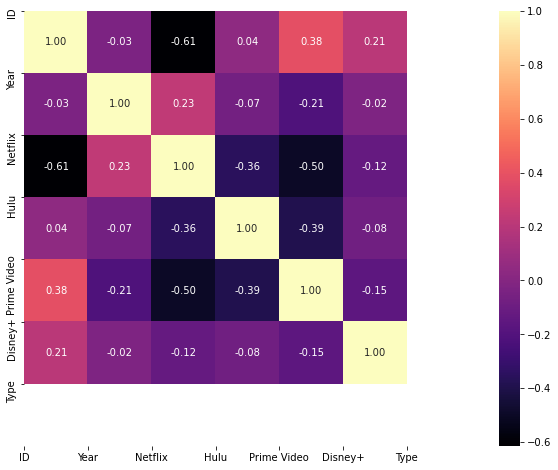

In [21]:
plt.figure(figsize = (10, 10))
corr = df_tvshows_plotline.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [22]:
df_tvshows_plotline = df_tvshows_plotline['Plotline']
tvshows_plotline_w = ' '.join(df_tvshows_plotline)

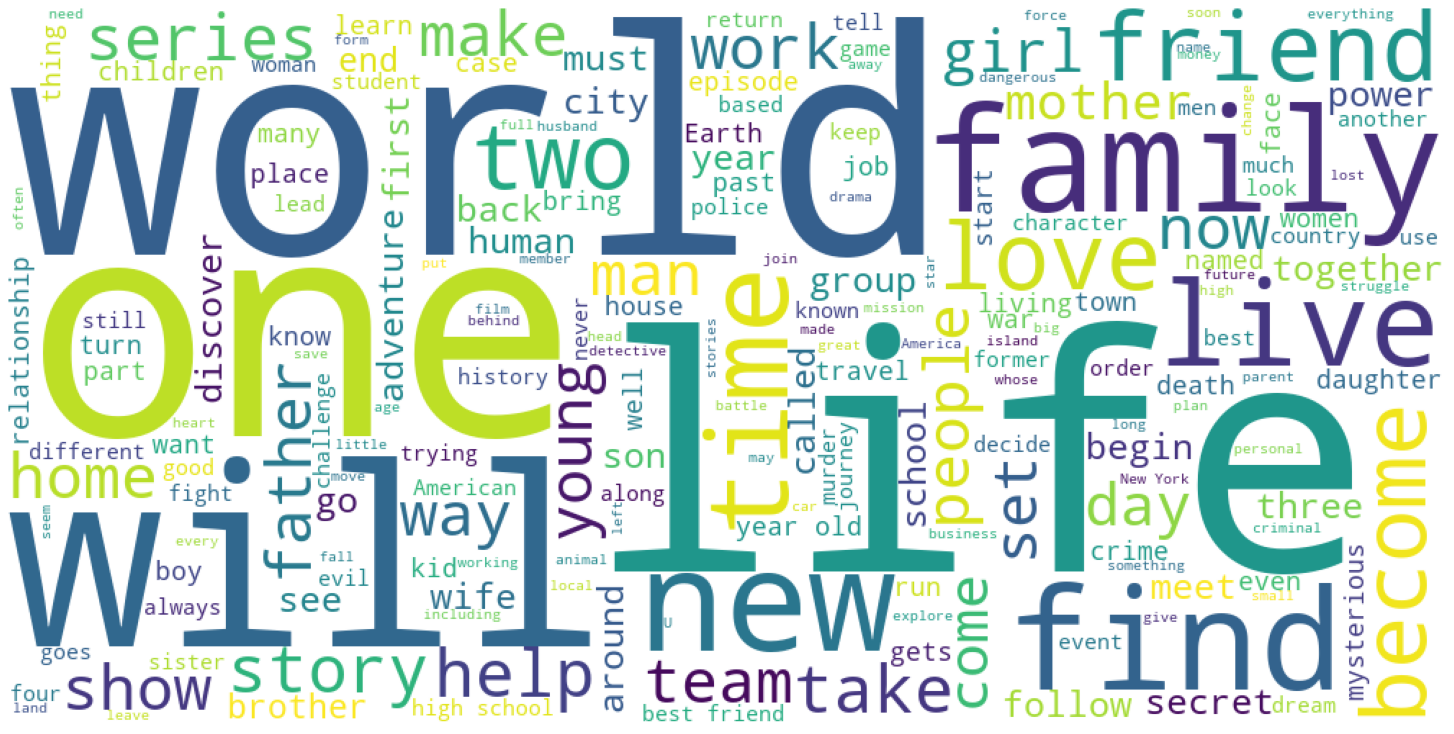

In [23]:
stopwords = set(STOPWORDS)
 
wordcloud_all_plotline_tvshows = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tvshows_plotline_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_all_plotline_tvshows)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [24]:
tvshows_plotline_w = tvshows_plotline_w.lower()

stop_words_english_tvshows = set(STOPWORDS)

word_tokens_english_tvshows = word_tokenize(tvshows_plotline_w)

filtered_tvshow_plotline = [w for w in word_tokens_english_tvshows if not w in stop_words_english_tvshows]

filtered_tvshow_plotline = " ".join(filtered_tvshow_plotline)

filtered_tvshow_plotline = re.sub("'s", '', filtered_tvshow_plotline)

filtered_tvshow_plotline = re.sub(r'[0-9]+', '', filtered_tvshow_plotline)

final_tvshow_plotline = re.sub(r'[^\w\s]', '', filtered_tvshow_plotline)

plotline_tvshows_corpus_len = len(filtered_tvshow_plotline.split())
plotline_tvshows_corpus_len

184538

In [25]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [26]:
plotline_ngram1_tvshows = FreqDist()

plotline_ngram1 = extract_ngrams(final_tvshow_plotline[:plotline_tvshows_corpus_len], 1)

for word in plotline_ngram1:
    plotline_ngram1_tvshows[word.lower()] += 1

In [27]:
plotline_ngram1_tvshows.most_common(10)

[('life', 144),
 ('one', 129),
 ('new', 124),
 ('will', 116),
 ('family', 113),
 ('world', 98),
 ('years', 82),
 ('man', 69),
 ('young', 69),
 ('two', 69)]

In [28]:
plotline_ngram2_tvshows = FreqDist()

plotline_ngram2 = extract_ngrams(final_tvshow_plotline[:plotline_tvshows_corpus_len], 2)

for word in plotline_ngram2:
    plotline_ngram2_tvshows[word.lower()] += 1

In [29]:
plotline_ngram2_tvshows.most_common(10)

[('new york', 30),
 ('york city', 11),
 ('high school', 11),
 ('best friend', 11),
 ('young man', 10),
 ('new life', 9),
 ('one day', 9),
 ('rainbow kingdom', 9),
 ('years later', 9),
 ('los angeles', 8)]

In [30]:
plotline_ngram3_tvshows = FreqDist()

plotline_ngram3 = extract_ngrams(final_tvshow_plotline[:plotline_tvshows_corpus_len], 3)

for word in plotline_ngram3:
    plotline_ngram3_tvshows[word.lower()] += 1

In [31]:
plotline_ngram3_tvshows.most_common(10)

[('new york city', 11),
 ('cha eun sang', 5),
 ('living new york', 4),
 ('world war ii', 4),
 ('shah rukh khan', 3),
 ('true rainbow kingdom', 3),
 ('rainbow kingdom follows', 3),
 ('kingdom follows yearold', 3),
 ('follows yearold true', 3),
 ('yearold true best', 3)]

In [32]:
plotline_ngram4_tvshows = FreqDist()

plotline_ngram4 = extract_ngrams(final_tvshow_plotline[:plotline_tvshows_corpus_len], 4)

for word in plotline_ngram4:
    plotline_ngram4_tvshows[word.lower()] += 1

In [33]:
plotline_ngram4_tvshows.most_common(10)

[('true rainbow kingdom follows', 3),
 ('rainbow kingdom follows yearold', 3),
 ('kingdom follows yearold true', 3),
 ('follows yearold true best', 3),
 ('yearold true best friend', 3),
 ('true best friend bartleby', 3),
 ('best friend bartleby cat', 3),
 ('friend bartleby cat help', 3),
 ('bartleby cat help whimsical', 3),
 ('cat help whimsical citizens', 3)]

In [34]:
plotline_ngram5_tvshows = FreqDist()

plotline_ngram5 = extract_ngrams(final_tvshow_plotline[:plotline_tvshows_corpus_len], 5)

for word in plotline_ngram5:
    plotline_ngram5_tvshows[word.lower()] += 1

In [35]:
plotline_ngram5_tvshows.most_common(10)

[('true rainbow kingdom follows yearold', 3),
 ('rainbow kingdom follows yearold true', 3),
 ('kingdom follows yearold true best', 3),
 ('follows yearold true best friend', 3),
 ('yearold true best friend bartleby', 3),
 ('true best friend bartleby cat', 3),
 ('best friend bartleby cat help', 3),
 ('friend bartleby cat help whimsical', 3),
 ('bartleby cat help whimsical citizens', 3),
 ('cat help whimsical citizens rainbow', 3)]

In [36]:
# Netflix Wordcloud
netflix_plotline_tvshows_t = netflix_plotline_tvshows['Plotline']
netflix_tvshows_plotline_w = ' '.join(netflix_plotline_tvshows_t)


The Wordcloud Generated from Plotlines of Netflix is : 



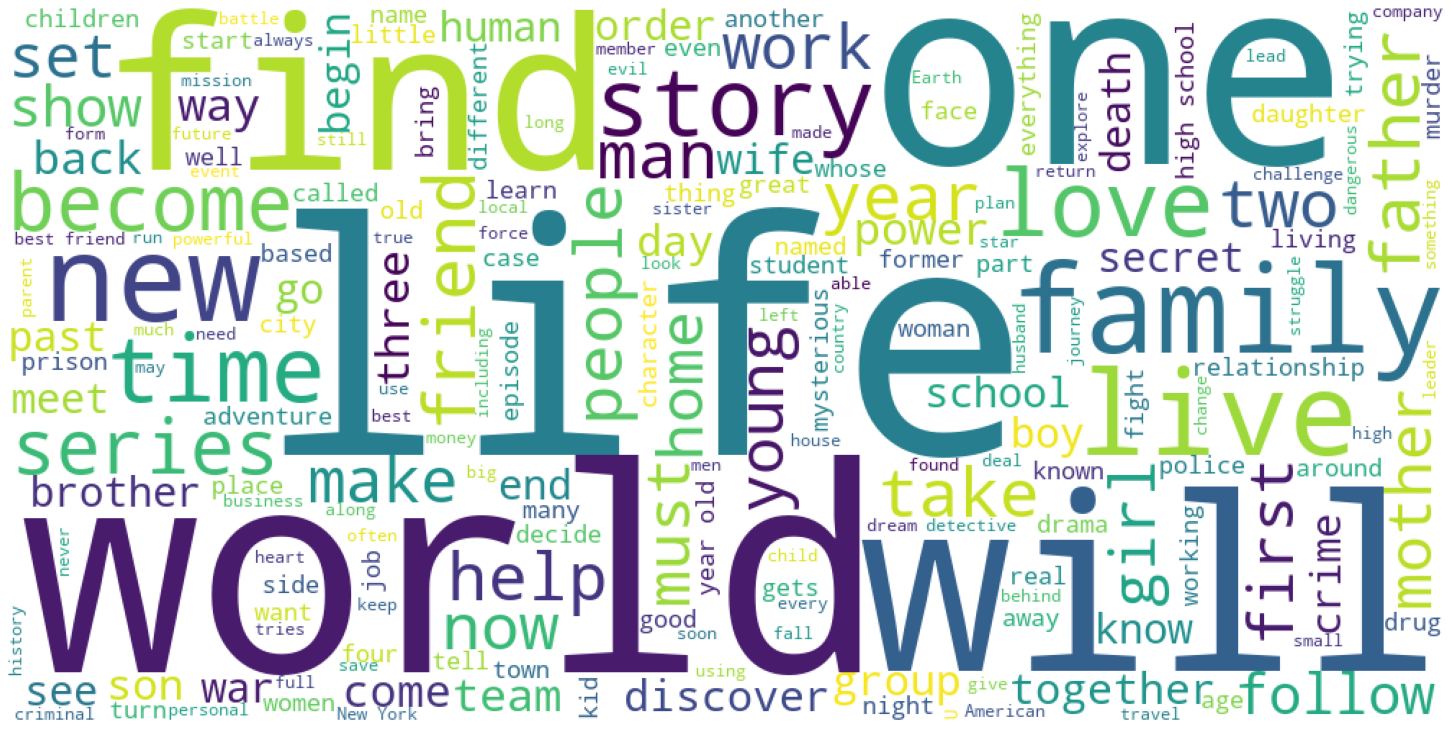

In [37]:
stopwords = set(STOPWORDS)
 
wordcloud_netflix_plotline_tvshows = WordCloud(width = 1000, height = 500,
                                           background_color ='white',
                                           stopwords = stopwords,
                                           min_font_size = 10
                                          ).generate(netflix_tvshows_plotline_w)

print('\nThe Wordcloud Generated from Plotlines of Netflix is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_netflix_plotline_tvshows)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [38]:
# Hulu Wordcloud
hulu_plotline_tvshows_t = hulu_plotline_tvshows['Plotline']
hulu_tvshows_plotline_w = ' '.join(hulu_plotline_tvshows_t)


The Wordcloud Generated from Plotlines of Hulu is : 



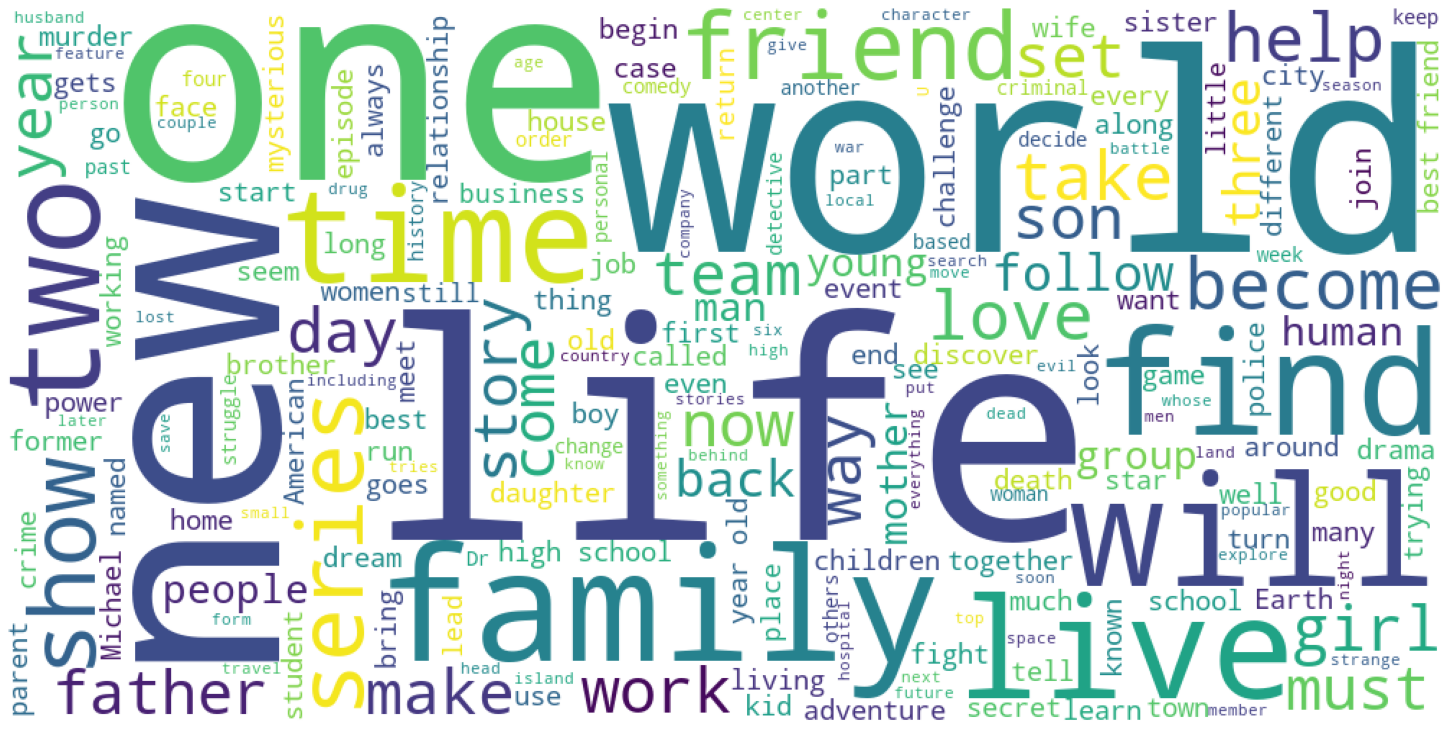

In [39]:
stopwords = set(STOPWORDS)
 
wordcloud_hulu_plotline_tvshows = WordCloud(width = 1000, height = 500,
                                        background_color ='white',
                                        stopwords = stopwords,
                                        min_font_size = 10
                                       ).generate(hulu_tvshows_plotline_w)
  
print('\nThe Wordcloud Generated from Plotlines of Hulu is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_hulu_plotline_tvshows)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [40]:
# Prime Video Wordcloud
prime_video_plotline_tvshows_t = prime_video_plotline_tvshows['Plotline']
prime_video_tvshows_plotline_w = ' '.join(prime_video_plotline_tvshows_t)


The Wordcloud Generated from Plotlines of Prime Video is : 



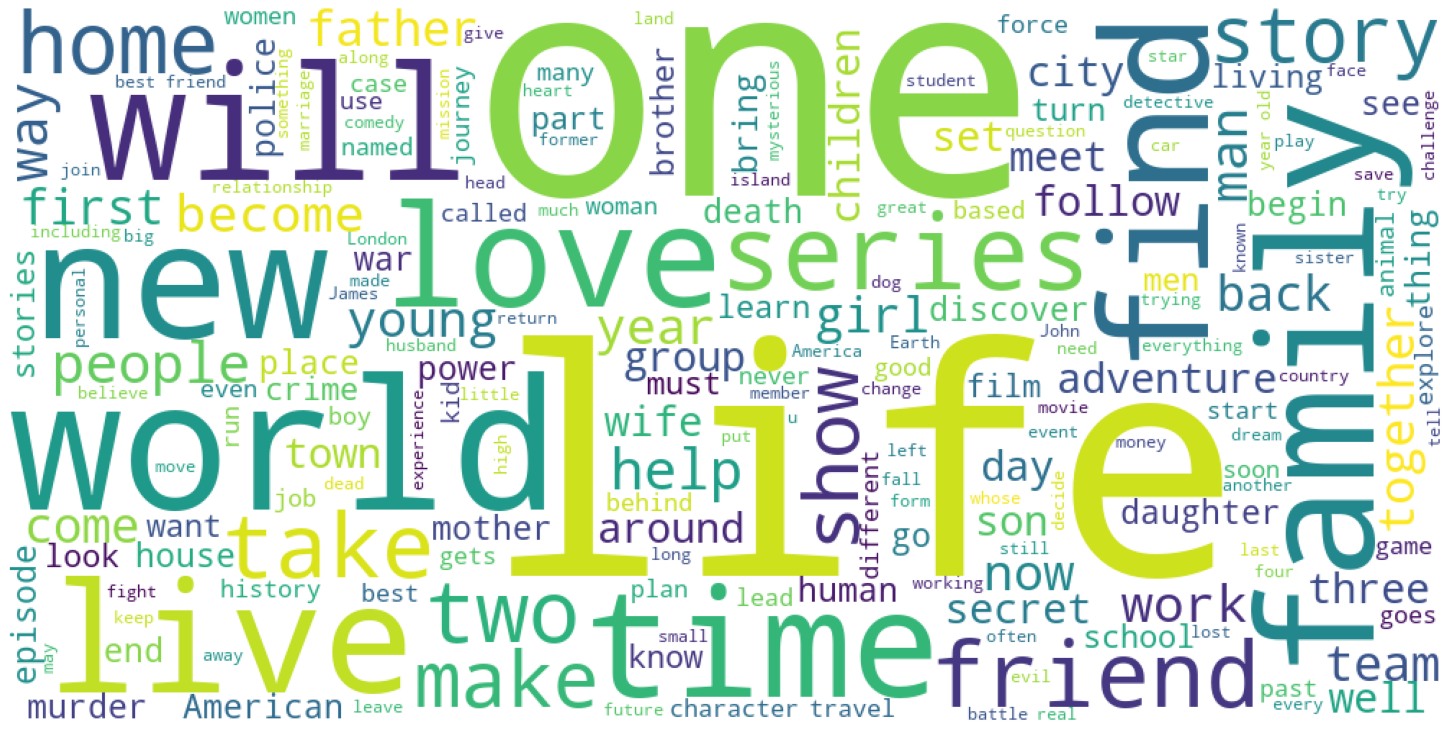

In [41]:
stopwords = set(STOPWORDS)
 
wordcloud_prime_video_plotline_tvshows = WordCloud(width = 1000, height = 500,
                                               background_color ='white',
                                               stopwords = stopwords,
                                               min_font_size = 10
                                              ).generate(prime_video_tvshows_plotline_w)
  
print('\nThe Wordcloud Generated from Plotlines of Prime Video is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_prime_video_plotline_tvshows)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [42]:
# Disney+ Wordcloud
disney_plotline_tvshows_t = disney_plotline_tvshows['Plotline']
disney_tvshows_plotline_w = ' '.join(disney_plotline_tvshows_t)


The Wordcloud Generated from Plotlines of Disney+ is : 



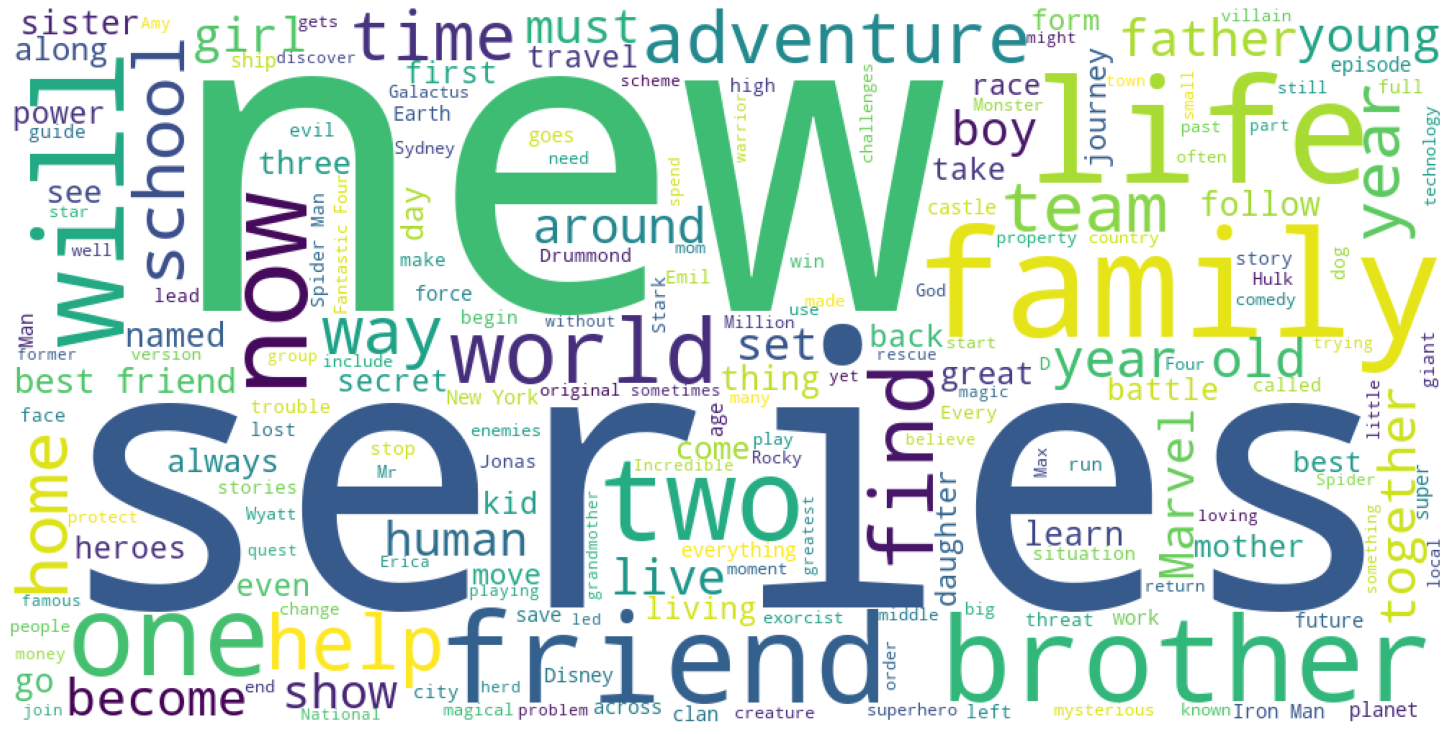

In [43]:
stopwords = set(STOPWORDS)
 
wordcloud_disney_plotline_tvshows = WordCloud(width = 1000, height = 500,
                                          background_color ='white',
                                          stopwords = stopwords,
                                          min_font_size = 10
                                         ).generate(disney_tvshows_plotline_w)
  
print('\nThe Wordcloud Generated from Plotlines of Disney+ is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_disney_plotline_tvshows)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()